In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
# import folium


In [90]:
data = pd.read_csv('houses_current.csv')
data.head()
len(data)

9674

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9674 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  9674 non-null   object 
 1   area        9497 non-null   float64
 2   num_floors  7706 non-null   float64
 3   bedrooms    7577 non-null   float64
 4   address     9674 non-null   object 
 5   price       9548 non-null   float64
 6   url         9674 non-null   object 
dtypes: float64(4), object(3)
memory usage: 529.2+ KB


REMOVE DUPLICATES

In [92]:
print('Sum of duplicates: ', data.duplicated(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).sum())
data = data.drop_duplicates(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).copy()
print('After removing duplicates: ', data.duplicated().sum())
print('Length of data then: ', len(data))

Sum of duplicates:  1066
After removing duplicates:  0
Length of data then:  8608


CONVERT OBJECT TO FLOAT64 AND STRING

In [93]:
data = data.astype({'houseTypes':'string','address':'string','url':'string'})

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  8608 non-null   string 
 1   area        8447 non-null   float64
 2   num_floors  6798 non-null   float64
 3   bedrooms    6698 non-null   float64
 4   address     8608 non-null   string 
 5   price       8492 non-null   float64
 6   url         8608 non-null   string 
dtypes: float64(4), string(3)
memory usage: 538.0 KB


In [95]:
for col in data.columns:
    print('Ratio of missing data of ' + str(col) +': ' + str(round(data[col].isna().sum()*100/len(data[col]),3)) + '%')

Ratio of missing data of houseTypes: 0.0%
Ratio of missing data of area: 1.87%
Ratio of missing data of num_floors: 21.027%
Ratio of missing data of bedrooms: 22.189%
Ratio of missing data of address: 0.0%
Ratio of missing data of price: 1.348%
Ratio of missing data of url: 0.0%


In [96]:
data[['district','city']] = data['address'].apply(lambda x: pd.Series(str(x).split(', ')))

In [97]:
data = data.drop(['address'], axis=True)

In [98]:
data.reset_index(inplace=True, drop=True)

In [99]:
data = data[['houseTypes','area','num_floors','bedrooms','district','city','price','url']]

In [100]:
data.head()

,houseTypes,area,num_floors,bedrooms,district,city,price,url
0,Bán Nhà riêng,130.0,3.0,7.0,Quận 12,TP Hồ Chí Minh,9.200,https://batdongsan.vn/ban-biet-thu-san-vuon-qu...
1,Bán Nhà riêng,65.0,NaN,2.0,Ngũ Hành Sơn,Đà Nẵng,2.900,https://batdongsan.vn/29-ty-dien-tich-6580m2-n...
2,Bán Nhà riêng,90.0,5.0,5.0,Hai Bà Trưng,Hà Nội,14.000,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...
3,Bán Nhà riêng,50.0,5.0,5.0,Quận 3,TP Hồ Chí Minh,0.001,https://batdongsan.vn/quan-3-le-van-sy-5-tang-...
4,Bán Nhà riêng,30.0,1.0,2.0,Gò Vấp,TP Hồ Chí Minh,3.700,https://batdongsan.vn/nha-moi-full-noi-that-hx...


In [166]:
# data.to_csv('houses.csv',index=False)
# data.to_excel('houses.xlsx',index=False)

## Xử lí giá

In [101]:
low_noise_data = data.loc[(data['price'] < 0.1)]
hign_noise_data = data.loc[(data['price'] >= 500)]
null_price_data = data[data['price'].isna()]

In [149]:
# low_noise_data = low_noise_data.copy()
# low_noise_data.to_excel('error_price_low.xlsx', index=False)  

In [150]:
# hign_noise_data = hign_noise_data.copy()
# hign_noise_data.to_excel('error_price_hign.xlsx', index=False)  

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\958291345.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_1['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

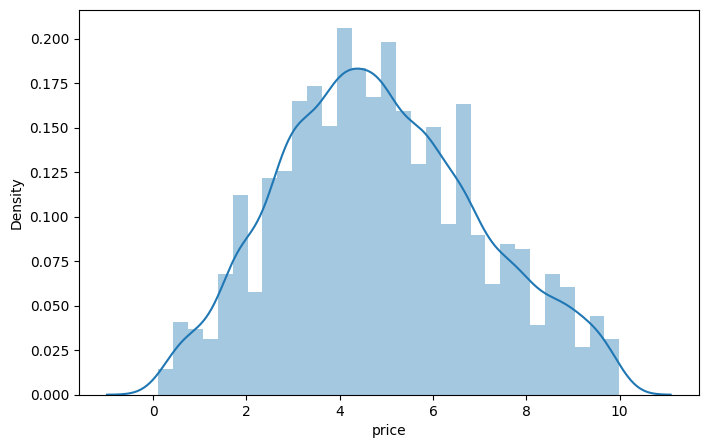

In [54]:
house_data_1 = data.loc[(data['price'] >= 0.1) & (data['price'] < 10)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_1['price'])

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\840156701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_2['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

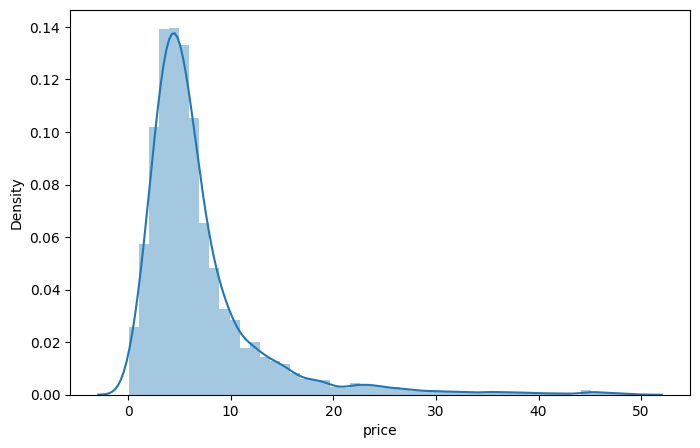

In [55]:
house_data_2 = data.loc[(data['price'] >= 0.1) & (data['price'] < 50)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_2['price'])

In [102]:
house_data = data.loc[(data['price'] >= 0.1) & (data['price'] < 500)]
house_data.to_excel('house_data.xlsx', index=False)

In [57]:
len(house_data)

8266

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\3740483212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

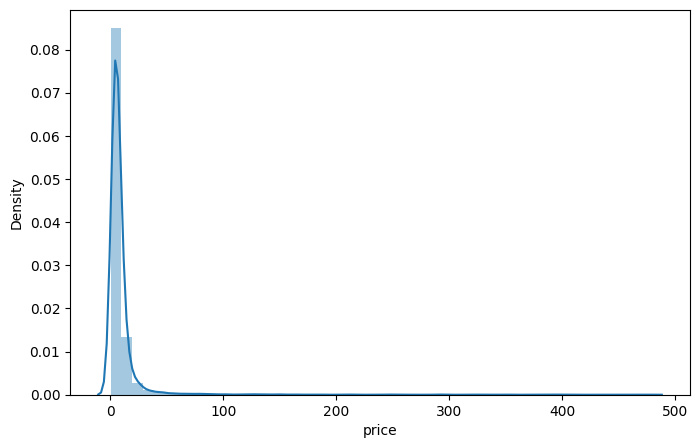

In [58]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['price'])

## Xử lí area

In [59]:
house_data['area'].isna().sum()

124

In [60]:
house_data['area'].describe()

count      8142.000000
mean         97.477207
std        1148.948237
min           3.000000
25%          43.000000
50%          58.000000
75%          84.000000
max      100103.000000
Name: area, dtype: float64

In [103]:
house_data = house_data.loc[(house_data['area'] >= 10) & (house_data['area'] <= 20000)]

In [104]:
house_data['area'].describe()

count     8096.000000
mean        85.640689
std        303.197151
min         10.000000
25%         44.000000
50%         59.000000
75%         85.000000
max      18264.000000
Name: area, dtype: float64

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\255560388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data_3['area'])


<AxesSubplot: xlabel='area', ylabel='Density'>

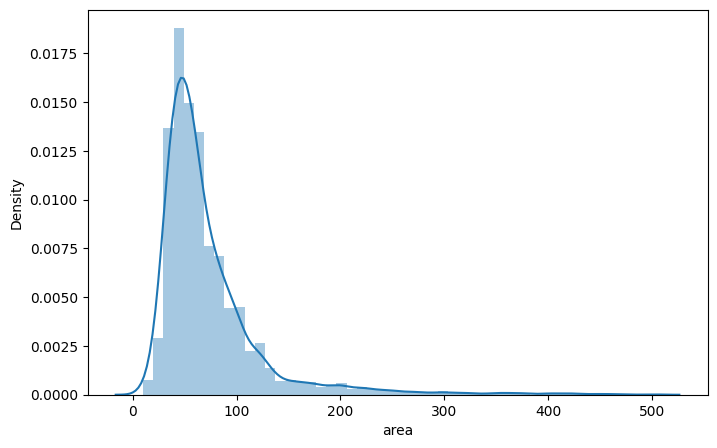

In [63]:
house_data_3 = house_data.loc[(house_data['area'] >=10) & (house_data['area'] <=500)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_3['area'])

In [105]:
len(house_data)

8096

# Xử lý num_floors và bedrooms

In [106]:
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1680
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

In [107]:
house_data.loc[house_data['num_floors'] > 11, 'num_floors'] = None
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1700
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\4248583683.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['num_floors'])


<AxesSubplot: xlabel='num_floors', ylabel='Density'>

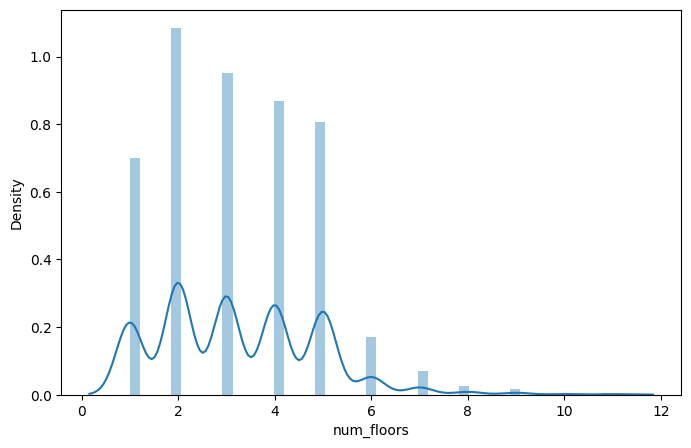

In [67]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['num_floors'])

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\2031751330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['bedrooms'])


<AxesSubplot: xlabel='bedrooms', ylabel='Density'>

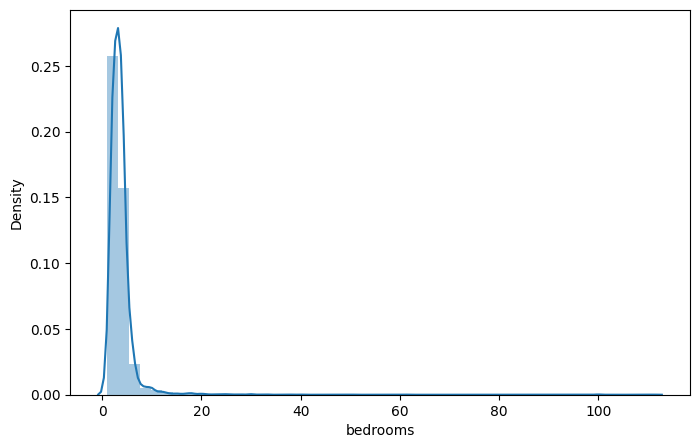

In [68]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['bedrooms'])

In [108]:
numeric_houses = pd.DataFrame({'area':house_data['area'],'num_floors':house_data['num_floors'],'bedrooms':house_data['bedrooms'],'price':house_data['price']})
numeric_houses.isna().sum()

area             0
num_floors    1700
bedrooms      1709
price            0
dtype: int64

In [109]:
len(numeric_houses)

8096

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [111]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [112]:
test_numeric_house = numeric_houses.copy()
test_numeric_house.isna().sum()

area             0
num_floors    1700
bedrooms      1709
price            0
dtype: int64

In [113]:
len(test_numeric_house)

8096

In [114]:
k_errors = optimize_k(data=test_numeric_house, target='price')
print(k_errors)

[{'K': 1, 'RMSE': 17.120584945798544}, {'K': 2, 'RMSE': 19.179746719473975}, {'K': 3, 'RMSE': 19.215943596614498}, {'K': 4, 'RMSE': 19.187231943803106}, {'K': 5, 'RMSE': 18.37773331267445}, {'K': 6, 'RMSE': 19.408072756808533}, {'K': 7, 'RMSE': 18.096497294286063}, {'K': 8, 'RMSE': 18.384712275317742}, {'K': 9, 'RMSE': 18.179111425959498}, {'K': 10, 'RMSE': 18.587207238622003}, {'K': 11, 'RMSE': 18.390243197786575}, {'K': 12, 'RMSE': 18.082770843015165}, {'K': 13, 'RMSE': 17.706677794586284}, {'K': 14, 'RMSE': 17.531815420113276}, {'K': 15, 'RMSE': 17.856434046708}, {'K': 16, 'RMSE': 17.547360057660658}, {'K': 17, 'RMSE': 17.354498035210295}, {'K': 18, 'RMSE': 17.490362610336025}, {'K': 19, 'RMSE': 17.656572675815987}]


In [115]:
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(numeric_houses)
df_imputed = pd.DataFrame(imputed, columns=numeric_houses.columns)

In [116]:
df_imputed.isna().sum()

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

In [117]:
print(len(df_imputed['num_floors']))
print(len(df_imputed['bedrooms']))

8096
8096


In [118]:
df_imputed['bedrooms'].describe()

count    8096.000000
mean        3.791517
std         3.246003
min         1.000000
25%         2.705882
50%         3.000000
75%         4.000000
max       111.000000
Name: bedrooms, dtype: float64

In [119]:
print(len(house_data))

8096


In [179]:
# numeric_houses.to_excel('numeric_houses.xlsx',index=False)
# df_imputed.to_excel('df_imputed.xlsx',index=False)

In [123]:
house_data['new_num_floors'] = df_imputed['num_floors'].round(0)
house_data['new_bedrooms'] = df_imputed['bedrooms'].round(0)

In [120]:
# house_data.insert(loc=len(house_data.columns), column='new_num_floors', value=df_imputed['num_floors'].round(0))
# house_data.insert(loc=len(house_data.columns), column='new_bedrooms', value=df_imputed['bedrooms'].round(0))

In [124]:
house_data = house_data.reset_index()

In [132]:
house_data.isna().sum()

level_0              0
index                0
houseTypes           0
area                 0
num_floors        1700
bedrooms          1709
district             0
city                 0
price                0
url                  0
new_num_floors       0
new_bedrooms         0
dtype: int64

In [130]:
# house_data.to_excel('full_houses.xlsx', index=False)

In [126]:
house_data

,level_0,index,houseTypes,area,num_floors,bedrooms,district,city,price,url,new_num_floors,new_bedrooms
0,0,0,Bán Nhà riêng,130.0,3.0,7.0,Quận 12,TP Hồ Chí Minh,9.20,https://batdongsan.vn/ban-biet-thu-san-vuon-qu...,3.0,7.0
1,1,1,Bán Nhà riêng,65.0,NaN,2.0,Ngũ Hành Sơn,Đà Nẵng,2.90,https://batdongsan.vn/29-ty-dien-tich-6580m2-n...,2.0,2.0
2,2,2,Bán Nhà riêng,90.0,5.0,5.0,Hai Bà Trưng,Hà Nội,14.00,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...,5.0,5.0
3,3,4,Bán Nhà riêng,30.0,1.0,2.0,Gò Vấp,TP Hồ Chí Minh,3.70,https://batdongsan.vn/nha-moi-full-noi-that-hx...,1.0,2.0
4,4,5,Bán Nhà riêng,38.0,3.0,3.0,Bình Thạnh,TP Hồ Chí Minh,4.40,https://batdongsan.vn/ban-gap-nha-dep-dien-bie...,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8091,8091,8603,Bán Nhà riêng,61.0,3.0,4.0,Gò Vấp,TP Hồ Chí Minh,9.50,https://batdongsan.vn/hxh-3-lau-47x13-nguyen-v...,3.0,4.0
8092,8092,8604,Bán Nhà riêng,64.0,NaN,5.0,Bình Thạnh,TP Hồ Chí Minh,9.50,https://batdongsan.vn/hxh-4x16-xo-viet-nghe-ti...,3.0,5.0
8093,8093,8605,Bán Nhà riêng,60.0,3.0,3.0,Tân Phú,TP Hồ Chí Minh,5.40,https://batdongsan.vn/nha-3-tang-xe-hoi-do-cua...,3.0,3.0
8094,8094,8606,Bán Nhà riêng,90.0,NaN,2.0,Biên Hòa,Đồng Nai,2.85,https://batdongsan.vn/ban-nha-90m2-gan-giao-xu...,2.0,2.0


C:\Users\84947\AppData\Local\Temp\ipykernel_19136\202928946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['new_num_floors'])


<AxesSubplot: xlabel='new_num_floors', ylabel='Density'>

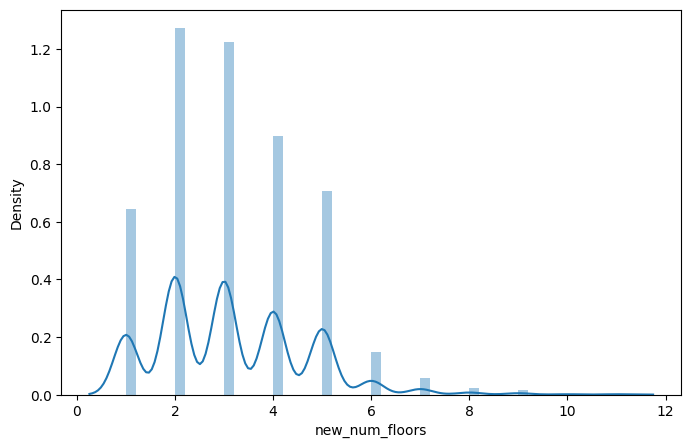

In [128]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['new_num_floors'])

C:\Users\84947\AppData\Local\Temp\ipykernel_19136\3734845656.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['new_bedrooms'])


<AxesSubplot: xlabel='new_bedrooms', ylabel='Density'>

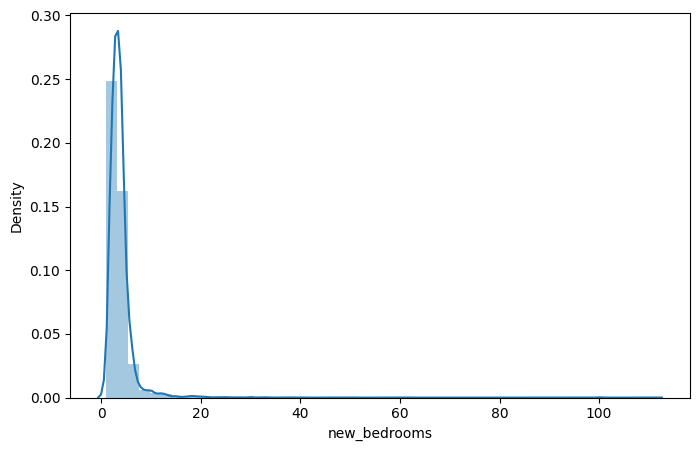

In [129]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['new_bedrooms'])

# Thử nghiệm KNN cho missing values

In [29]:
not_null_houses = house_data.dropna() # phải lấy house_data lúc còn null (trước khi fill ở phần trên)
not_null_houses.to_excel('not_null_houses.xlsx',index=False)

In [30]:
i1 = np.random.choice(a=not_null_houses.index, size=50)
i2 = np.random.choice(a=not_null_houses.index, size=50)
print(i1)
print(i2)

[ 911 1186 7861 1546 4291   72 7519 2193 4654 3814 3168 4053 2109 2473
 5916 3793 4063 6909 8370 5013 1794 4654 6629  803 8398 6755 4127 1119
 6168 5439 1732 7704 6909 3291  147 2143 5744 3492 8596 4855 1665 4043
 5180 3849 5290 4065 5192 1994  484 1831]
[3326 1443  155  162 5886 4670 4155 2604 1554 3030 3689  816  441 2176
 2228 7368 6113 7562 5504 1774 4973 3725 7206 5099  297 3094 2615 4994
 6385 7876 1970 1383 5776 8321 2131 7698 3135  309 6346 6267 7301 7725
 8553 3263 2123  435 1442 6563 2191  164]


In [31]:
null_houses = pd.DataFrame({'area':not_null_houses['area'],'num_floors':not_null_houses['num_floors'],'bedrooms':not_null_houses['bedrooms'],'price':not_null_houses['price']})
null_houses.isna().sum()

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

In [32]:
null_houses.loc[i1, 'num_floors'] = np.nan
null_houses.loc[i2, 'bedrooms'] = np.nan

In [33]:
null_houses.loc[164]

area          15.0
num_floors     4.0
bedrooms       NaN
price          1.8
Name: 164, dtype: float64

In [34]:
null_houses.isna().sum()

area           0
num_floors    48
bedrooms      50
price          0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [36]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [37]:
k_errors = optimize_k(data=null_houses, target='price')
print(k_errors)

[{'K': 1, 'RMSE': 10.377036074956955}, {'K': 3, 'RMSE': 10.315518759485371}, {'K': 5, 'RMSE': 10.288269348019378}, {'K': 7, 'RMSE': 10.438021171138988}, {'K': 9, 'RMSE': 10.211586494427266}, {'K': 11, 'RMSE': 10.23628724167357}, {'K': 13, 'RMSE': 10.115194052110384}, {'K': 15, 'RMSE': 10.227989253865525}, {'K': 17, 'RMSE': 10.330540424285378}, {'K': 19, 'RMSE': 10.288387655322568}]


In [38]:
imputer_test = KNNImputer(n_neighbors=13)
imputed_test = imputer_test.fit_transform(null_houses)
df_imputed_test = pd.DataFrame(imputed_test, columns=null_houses.columns)

In [40]:
df_imputed_test.isna().sum()
df_imputed_test.to_excel('df_imputed_test.xlsx',index=False)

Note: so sánh not_null_houses.xlsx và df_imputed_test.xlsx

 # Initialize google map


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my_app')

# Tạo đối tượng geocoder
geocoder = geolocator.geocode

# Geocode the addresses to obtain latitude and longitude coordinates
locations = [geocoder(f"{district}, {city}") for district, city in zip(house_data['district'][0:100], house_data['city'][0:100])]

# Extract latitude and longitude coordinates from the locations
latitude = [location.latitude for location in locations]
longitude = [location.longitude for location in locations]

# Mark points on google map

In [ ]:
lat = 10.861410750000001
long = 106.66420925636413
zoom = 6
gmap2 = folium.Map(location=(lat, long), zoom_start=zoom)
def _addMarker(latitudes, longitudes,gmap):
    # Kiểm tra độ dài của danh sách latitude và longitude
    if len(latitudes) != len(longitudes):
        print("Danh sách latitude và longitude không cùng độ dài.")
        return
    # Thêm Marker vào map_obj
    for lat, lng in zip(latitudes, longitudes):
        marker = folium.Marker(location=(lat, lng))
        marker.add_to(gmap)
_addMarker(latitude,longitude,gmap2)
gmap2.save("foliumMarkerMultiple.html")

# Heatmap

In [ ]:
from folium.plugins import HeatMap

lat = 10.861410750000001
long = 106.66420925636413
zoom = 6
gmap2 = folium.Map(location=(lat, long), zoom_start=zoom)
maximum = max(house_data['price'])

def _addHeatMap(map_obj, latitudes, longitudes, values):
    # Tạo danh sách các tọa độ (latitude, longitude, value)
    data = list(zip(latitudes, longitudes, values))
    # Tạo HeatMap từ danh sách tọa độ và values
    heat_map = HeatMap(data)
    # Thêm HeatMap vào bản đồ
    map_obj.add_child(heat_map)
_addHeatMap(gmap2,latitude,longitude,house_data['price'][0:100])
gmap2.save("foliumHeatMap.html")

# Encoding

In [136]:
new_house_data = pd.read_excel('full_houses.xlsx')
new_house_data.drop(['district','url','level_0','index','num_floors','bedrooms'],axis=1,inplace=True)
new_house_data = new_house_data[['houseTypes','area','new_num_floors','new_bedrooms','city','price']]
new_house_data

,houseTypes,area,new_num_floors,new_bedrooms,city,price
0,Bán Nhà riêng,130.0,3,7,TP Hồ Chí Minh,9.20
1,Bán Nhà riêng,65.0,2,2,Đà Nẵng,2.90
2,Bán Nhà riêng,90.0,5,5,Hà Nội,14.00
3,Bán Nhà riêng,30.0,1,2,TP Hồ Chí Minh,3.70
4,Bán Nhà riêng,38.0,3,3,TP Hồ Chí Minh,4.40
...,...,...,...,...,...,...
8091,Bán Nhà riêng,61.0,3,4,TP Hồ Chí Minh,9.50
8092,Bán Nhà riêng,64.0,3,5,TP Hồ Chí Minh,9.50
8093,Bán Nhà riêng,60.0,3,3,TP Hồ Chí Minh,5.40
8094,Bán Nhà riêng,90.0,2,2,Đồng Nai,2.85


In [137]:
print(new_house_data['city'].nunique())

38


# OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Tạo một đối tượng OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Chọn cột cần mã hóa
columns_to_encode = ['houseTypes','city']

# Mã hóa one-hot cho các cột
encoded_data = encoder.fit_transform(new_house_data[columns_to_encode])


# Tạo DataFrame mới từ dữ liệu đã mã hóa
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(columns_to_encode))

# Xóa các cột gốc trong biến data
new_house_data.drop(columns_to_encode, axis=1, inplace=True)

# Kết hợp dữ liệu đã mã hóa với biến data
new_house_data = pd.concat([new_house_data, encoded_df], axis=1)

# In ra 5 dòng đầu tiên của dữ liệu sau khi mã hóa
print(new_house_data.head())

In [ ]:
print(new_house_data.to_excel('oneHot.xlsx', index=False))

# Label Encoder

In [ ]:
new_house_data = pd.read_excel('new_house_data.xlsx')
new_house_data.drop(['district','url'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa nhãn cho cột 'loại nhà'
new_house_data['houseTypes_encoded'] = label_encoder.fit_transform(new_house_data['houseTypes'])

# Mã hóa nhãn cho cột 'city'
new_house_data['city_encoded'] = label_encoder.fit_transform(new_house_data['city'])

new_house_data.drop(['city','houseTypes'],axis=1,inplace=True)

# In ra 5 dòng đầu tiên của dữ liệu đã mã hóa
print(new_house_data.head())

In [ ]:
print(new_house_data.to_excel('Label.xlsx', index=False))

# TargetEncoder for city and OneHot for housetypes 

In [ ]:
new_house_data = pd.read_excel('new_house_data.xlsx')
new_house_data.drop(['district','url'],axis=1,inplace=True)

In [ ]:
#pip install category_encoders

In [140]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

target_encoder =ce.TargetEncoder() 
df_city=target_encoder.fit_transform(new_house_data['city'],new_house_data['price'])
df_new = df_city.join(new_house_data.drop('city',axis = 1))

# Tạo một đối tượng OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Chọn cột cần mã hóa
columns_to_encode = ['houseTypes']
# Mã hóa one-hot cho các cột
encoded_data = encoder.fit_transform(new_house_data[columns_to_encode])
# Tạo DataFrame mới từ dữ liệu đã mã hóa
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Xóa các cột gốc trong biến data
df_new.drop(columns_to_encode, axis=1, inplace=True)

# Kết hợp dữ liệu đã mã hóa với biến data
df_new = pd.concat([df_new, encoded_df], axis=1)

print(df_new.head())

        city   area  new_num_floors  new_bedrooms  price  \
0   9.292954  130.0               3             7    9.2   
1   7.417350   65.0               2             2    2.9   
2  11.089988   90.0               5             5   14.0   
3   9.292954   30.0               1             2    3.7   
4   9.292954   38.0               3             3    4.4   

   houseTypes_Bán Luxury home  houseTypes_Bán Nhà  houseTypes_Bán Nhà cổ  \
0                         0.0                 0.0                    0.0   
1                         0.0                 0.0                    0.0   
2                         0.0                 0.0                    0.0   
3                         0.0                 0.0                    0.0   
4                         0.0                 0.0                    0.0   

   houseTypes_Bán Nhà mặt phố  houseTypes_Bán Nhà riêng  
0                         0.0                       1.0  
1                         0.0                       1.0  
2       

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [141]:
print(df_new.to_excel('Target.xlsx', index=False))

None
